In [1]:
import pandas as pd
import numpy as np

In [2]:
df_l1= pd.read_csv('/kaggle/input/gender-abuse-dataset/train_ta_l1.csv')
df_l1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_1,NaN,NaN,0.0,0.0,0.0,0.0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_1,NaN,NaN,NaN,0.0,NaN,NaN
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_1,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_1,NaN,NaN,1.0,NaN,NaN,NaN
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_1,NaN,0.0,NaN,NaN,NaN,NaN
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_1,NaN,0.0,NaN,NaN,NaN,NaN


In [3]:
annotation_cols = ['ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5', 'ta_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [4]:
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_1
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_1,NaN,NaN,0.0,0.0,0.0,0.0,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_1,NaN,NaN,NaN,0.0,NaN,NaN,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_1,1.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_1,NaN,NaN,1.0,NaN,NaN,NaN,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_1,NaN,0.0,NaN,NaN,NaN,NaN,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_1,NaN,0.0,NaN,NaN,NaN,NaN,0


In [14]:
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

df['label_1'] = df['label_1'].astype(int)


print(df.head())
print(df.shape)

                                                text  label_1
0     *1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...        0
1     சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...        0
2           தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா        0
3      பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆        1
4    என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...        1
(6779, 2)


In [15]:
import nltk
import string
import re

def normalize_text(text):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  
                              u"\U0001F300-\U0001F5FF"  
                              u"\U0001F680-\U0001F6FF"  
                              u"\U0001F700-\U0001F77F"  
                              u"\U0001F780-\U0001F7FF"  
                              u"\U0001F800-\U0001F8FF"  
                              u"\U0001F900-\U0001F9FF"  
                              u"\U0001FA00-\U0001FA6F"  
                              u"\U0001FA70-\U0001FAFF"  
                              u"\U00002702-\U000027B0"  
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('<handle replaced>', '', text)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'^useruser', '', text)  
    return text

In [16]:
df.head()
df['text'] = df['text'].apply(normalize_text)
df

,text,label_1
0,முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும்,1
4,என்ன உடம்பு டா சாமி சும்மா வளுவளுனு முலை ...,1
...,...,...
6774,ஒம்மாள படிக்கல் புண்ட,1
6775,என்ன எழவுயா இது இதெல்லாம் ஒரு பெருமைனு ந...,0
6776,எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ளா...,0
6777,சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்க ...,0


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import matplotlib.pyplot as plt

X_texts = list(df['text'])
y = df['label_1'].values
X_texts

['       முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நிலம் இல்லை என்பதை நிரூபிக்க   ஆம் ஆண்டு வாங்கப்பட்ட பட்டாவை ஆதாரமாகக் காட்டியிருக்கிறார் மு க ஸ்டாலின்   இதற்கு காட்ட வேண்டிய     ',
 '   சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு பேச்சு புண்டையை  பாரு     போய் சீனா காரனுக்கு சூத்து குடு போ',
 '   தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா',
 '   பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் ',
 '  என்ன உடம்பு டா சாமி  சும்மா வளுவளுனு   முலை ஒவ்வொன்னும் தேங்காய் போல   நடிகை மாளவிகாவின் லேட்டஸ்ட் போட்டோஷூட்',
 '  கதற விட்ட புலம் பெயர் உறவுகள் கதி கலங்கி போன கோத்தா பையன்',
 '  பத்தினி வேச பு   வேற எடத்துல காட்டு இங்குட்டு ஒரு உருட்டு அங்குட்டு நல்லவன் வேசம் ஆ மூடிட்டு போடா மயிரு   \u200d',
 '  உன்னைய தூக்கி போட்டு நா ஓக்க   ',
 ' ஆடு திருடுனதுக்கு எப்பிடியும் தண்டனை கிடைச்சிரும்னு பயந்து ஆட்டைக்கூட ஒளிச்சி வச்சிட்டேன்          அப்புறம்         பக்கத்து தெருவுல கோழி திருடுனவனை ஏன் கைது செய்யலைன்னு சொல்லி ஜட்ஜய்யா என்னை விடுதலை செஞ்சிட்டாரு          ',
 ' ஊரடங்கால்   கோடிக்கு மேல் இழப்பு  

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2025-04-15 16:25:08.754187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744734308.949359      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744734309.005665      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:

max_features = 33064
max_len = 100
embed_size = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_texts)
word_index = tokenizer.word_index
X_sequences = tokenizer.texts_to_sequences(X_texts)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')
X_padded = np.array(X_padded)

y_cat = np.eye(2)[y]
X_padded

array([[ 1557,  2466,  5573, ...,     0,     0,     0],
       [ 1396,   323,  5574, ...,     0,     0,     0],
       [ 5575,  5575,   135, ...,     0,     0,     0],
       ...,
       [ 8512,  3879,  8513, ...,     0,     0,     0],
       [  406,   430,   602, ...,     0,     0,     0],
       [    4,   850, 33055, ...,     0,     0,     0]], dtype=int32)

In [20]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz
!gunzip cc.ta.300.vec.gz


--2025-04-15 16:29:13--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1213735937 (1.1G) [binary/octet-stream]
Saving to: ‘cc.ta.300.vec.gz’

cc.ta.300.vec.gz    100%[===================>]   1.13G   277MB/s    in 4.3s    

2025-04-15 16:29:17 (268 MB/s) - ‘cc.ta.300.vec.gz’ saved [1213735937/1213735937]



In [21]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y
y_cat = np.eye(2)[y]
y_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])


Fold 1
Epoch 1 - Train Acc: 0.5969, Val Acc: 0.6584
Epoch 2 - Train Acc: 0.7126, Val Acc: 0.7292
Epoch 3 - Train Acc: 0.7341, Val Acc: 0.7233
Epoch 4 - Train Acc: 0.7433, Val Acc: 0.7383
Epoch 5 - Train Acc: 0.7569, Val Acc: 0.7501
Epoch 6 - Train Acc: 0.7613, Val Acc: 0.7558
Epoch 7 - Train Acc: 0.7725, Val Acc: 0.7560
Epoch 8 - Train Acc: 0.7778, Val Acc: 0.7596
Epoch 9 - Train Acc: 0.7796, Val Acc: 0.7611
Epoch 10 - Train Acc: 0.7855, Val Acc: 0.7590
Epoch 11 - Train Acc: 0.7937, Val Acc: 0.7711
Epoch 12 - Train Acc: 0.7985, Val Acc: 0.7684
Epoch 13 - Train Acc: 0.8020, Val Acc: 0.7661
Epoch 14 - Train Acc: 0.8088, Val Acc: 0.7676
Epoch 15 - Train Acc: 0.8058, Val Acc: 0.7661
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.83      0.75      0.79      1942
    Not Hate       0.70      0.79      0.74      1448

    accuracy                           0.77      3390
   macro avg       0.76      0.77      0.76      3390
weighte

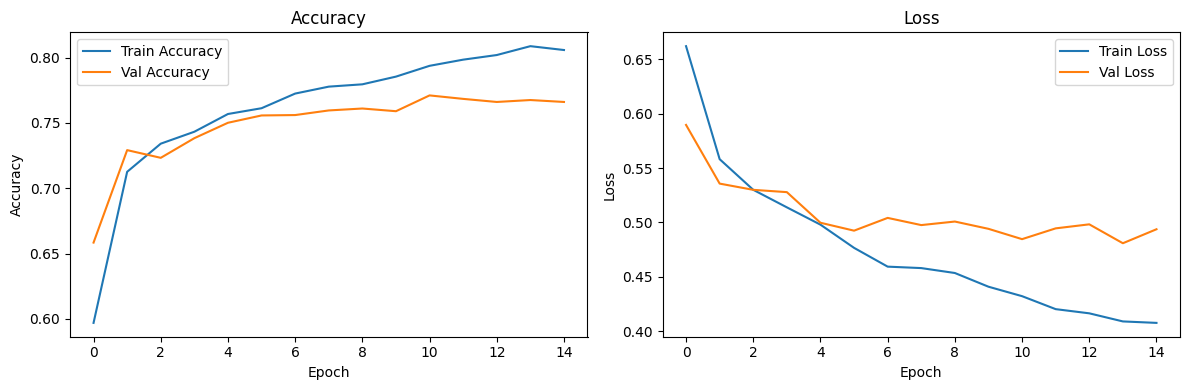


Fold 2
Epoch 1 - Train Acc: 0.6401, Val Acc: 0.7312
Epoch 2 - Train Acc: 0.7071, Val Acc: 0.6604
Epoch 3 - Train Acc: 0.7062, Val Acc: 0.7241
Epoch 4 - Train Acc: 0.7298, Val Acc: 0.7306
Epoch 5 - Train Acc: 0.7472, Val Acc: 0.7274
Epoch 6 - Train Acc: 0.7416, Val Acc: 0.6489
Epoch 7 - Train Acc: 0.7224, Val Acc: 0.7126
Epoch 8 - Train Acc: 0.7451, Val Acc: 0.7276
Epoch 9 - Train Acc: 0.7496, Val Acc: 0.7330
Epoch 10 - Train Acc: 0.7555, Val Acc: 0.7362
Epoch 11 - Train Acc: 0.7625, Val Acc: 0.7383
Epoch 12 - Train Acc: 0.7699, Val Acc: 0.7383
Epoch 13 - Train Acc: 0.7525, Val Acc: 0.7403
Epoch 14 - Train Acc: 0.7593, Val Acc: 0.7462
Epoch 15 - Train Acc: 0.7670, Val Acc: 0.7433
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.86      0.64      0.74      1880
    Not Hate       0.66      0.87      0.75      1509

    accuracy                           0.74      3389
   macro avg       0.76      0.76      0.74      3389
weighte

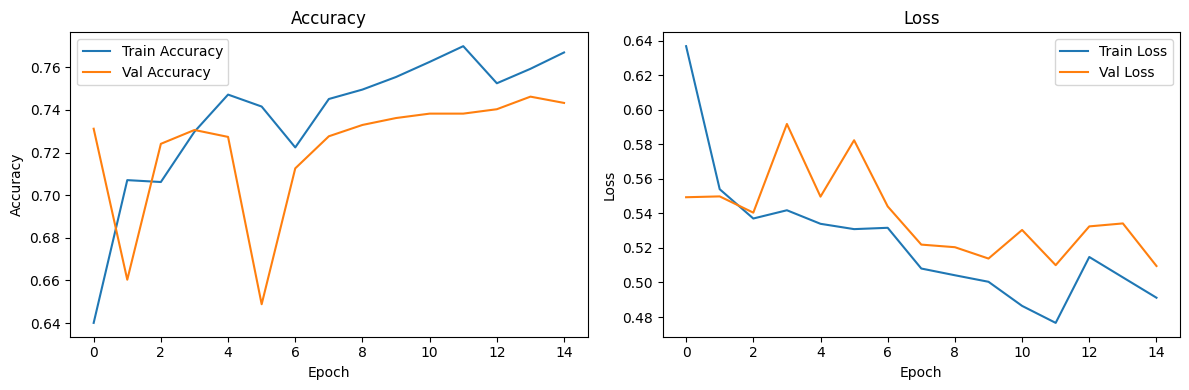


Average Results Across 2 Folds:
Precision: 0.77
Recall: 0.75
F1 Score: 0.75


In [23]:
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
with open('cc.ta.300.vec', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        if word in word_index:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_matrix[word_index[word]] = coefs




# embedding_matrix = np.zeros((max_features, embed_size))
# for word, i in tokenizer.word_index.items():
#     if i >= max_features:
#         continue
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector


class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTMClassifier, self).__init__()
        vocab_size, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.dropout1 = nn.Dropout(0.1)
        self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.1)
        self.out = nn.Linear(128, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.avgpool(x).squeeze(2)
        x = torch.relu(self.fc(x))
        x = self.dropout2(x)
        return self.out(x)


kf = KFold(n_splits=2, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")






for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"\nFold {fold+1}")
    train_dataset = TextDataset(X_padded[train_idx], y_cat[train_idx])
    val_dataset = TextDataset(X_padded[val_idx], y_cat[val_idx])
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    model = LSTMClassifier(embedding_matrix).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train_acc_hist, val_acc_hist, train_loss_hist, val_loss_hist = [], [], [], []
    best_val_f1 = 0.0
    best_model_path = f"model{fold+1}.pt"


    for epoch in range(15):
        model.train()
        total_loss, correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            correct += (preds == torch.argmax(labels, dim=1)).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_acc_hist.append(train_acc)
        train_loss_hist.append(total_loss / len(train_loader))

        model.eval()
        val_loss, correct = 0, 0
        y_preds, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                correct += (preds == torch.argmax(labels, dim=1)).sum().item()
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(torch.argmax(labels, axis=1).cpu().numpy())

        val_acc = correct / len(val_loader.dataset)
        val_acc_hist.append(val_acc)
        val_loss_hist.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


    report = classification_report(y_true, y_preds, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    val_f1 = report['weighted avg']['f1-score']


    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_true, y_preds, target_names=["Hate", "Not Hate"])}\n')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_hist, label="Train Accuracy")
    plt.plot(val_acc_hist, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_hist, label="Train Loss")
    plt.plot(val_loss_hist, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\nAverage Results Across 2 Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.2f}")



In [24]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


f1 = f1_score(y_true, y_preds, average='weighted')
precision = precision_score(y_true, y_preds, average='weighted')
recall = recall_score(y_true, y_preds, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.7422968311402682
Precision: 0.7701512979178994
Recall: 0.7432871053408086
{'Hate': {'precision': 0.8571428571428571, 'recall': 0.6446808510638298, 'f1-score': 0.7358834244080146, 'support': 1880}, 'Not Hate': {'precision': 0.6617721518987342, 'recall': 0.8661365142478462, 'f1-score': 0.7502870264064294, 'support': 1509}, 'accuracy': 0.7432871053408086, 'macro avg': {'precision': 0.7594575045207956, 'recall': 0.7554086826558379, 'f1-score': 0.743085225407222, 'support': 3389}, 'weighted avg': {'precision': 0.7701512979178994, 'recall': 0.7432871053408086, 'f1-score': 0.7422968311402682, 'support': 3389}}


In [25]:
vv= pd.read_csv('/kaggle/input/gender-abuse-dataset/test_ta_l1.csv')

In [26]:
import string
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text
vv['text'] = vv['text'].apply(lambda x: normalize_text(x))
processed_list = []
for j in vv['text']:
    process = j.replace('...','')
    processed_list.append(process)

vv = pd.DataFrame(processed_list)
vv.columns = ['text']
vv.head(n=5)


,text
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...
1,valimai ajithkumar ஏண்டா குள்ள புண்டைக...
2,ambedkarblueshirtrally இந்த போராட்டத்துக்கு ...
3,breaking திருச்சி மாவட்டம் மணப்பாறையை அடுத...
4,bachelor 😤😤😤😤😤படமாடா இது கோத்தா


In [28]:
model = LSTMClassifier(embedding_matrix).to(device)
model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))
model.eval()

sequence = tokenizer.texts_to_sequences(vv['text'])  
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
input_tensor = torch.tensor(sequence).long().to(device)

with torch.no_grad():
    outputs = model(input_tensor)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

ids = np.arange(1, len(predictions) + 1)
result_df = pd.DataFrame({'id': ids, 'value': predictions})
result_df.to_csv('Task1_output_tamil.csv', index=False)

print(result_df.head())

   id  value
0   1      1
1   2      1
2   3      0
3   4      0
4   5      1


/tmp/ipykernel_31/3331169280.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))


In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

true_df = pd.read_csv('/kaggle/input/gender-abuse-dataset/test_ta_l1.csv', on_bad_lines='skip', engine='python')

annotation_cols = ['ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5','ta_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue
    if not valid_votes:
        return None
    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)
    return 1 if ones >= zeros else 0

true_df['label_1'] = true_df[annotation_cols].apply(get_majority_label, axis=1)

true_df = true_df.dropna(subset=['label_1']).reset_index(drop=True)
true_labels = true_df['label_1'].astype(int).values

predictions = predictions[:len(true_labels)]

f1 = f1_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print("\nEvaluation on Test Set:")
print(f"F1 Score:      {f1:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"Accuracy:      {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Hate", "Not Hate"]))


Evaluation on Test Set:
F1 Score:      0.7498
Precision:     0.7610
Recall:        0.7507
Accuracy:      0.7507

Classification Report:
              precision    recall  f1-score   support

        Hate       0.82      0.68      0.74       596
    Not Hate       0.70      0.83      0.76       539

    accuracy                           0.75      1135
   macro avg       0.76      0.75      0.75      1135
weighted avg       0.76      0.75      0.75      1135

